# Loan Status Prediction
This file contains project: Loan Status Prediction Using Machin Learning

## Problem Statement
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## About Dataset
The Data is taken from Kaggle(https://www.kaggle.com/datasets/ninzaami/loan-predication)

The format of the data:

- Variable: Description
- Loan_ID: Unique Loan ID
- Gender: Male/ Female
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant Education (Graduate/ Under Graduate)
- Self_Employed: Self employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Coapplicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/ Semi Urban/ Rural
- Loan_Status: Loan approved (Y/N)

## Importing Libraries and dependencies

In [2]:
# Common Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [43]:
# Important function imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# model imports
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Data Collection

In [5]:
loan_data = pd.read_csv("Loan_data.csv")

In [6]:
loan_data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
212,LP001450,Male,Yes,0,Graduate,No,4456,0.0,131.0,180.0,0.0,Semiurban,N
337,LP001698,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural,Y
461,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
437,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y
520,LP002070,Male,Yes,3+,Not Graduate,No,2654,1998.0,128.0,360.0,0.0,Rural,N


Data is loaded correctly

In [7]:
list(loan_data.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [8]:
loan_data.shape

(981, 13)

total 981 different data points available

## Data Analysis and feature Engneering

First see type of data stored 

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


As loan ID is not important to us for now

In [10]:
loan_data.drop(columns=["Loan_ID"], inplace=True)

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB


Checking for duplicates

In [12]:
loan_data.duplicated().sum()

2

2 duplicates doesn't make that much diffrence can be ignored

Checking for Missing values

In [13]:
loan_data.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#droping missing values
loan_data = loan_data.dropna()

In [15]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
loan_data.shape

(769, 12)

In [17]:
loan_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
106,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
629,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
310,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural,Y
670,Male,Yes,0,Graduate,No,1820,1719.0,100.0,360.0,1.0,Urban,Y
109,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N


Making the loan status to 0 and 1

In [18]:
loan_data.replace({"Loan_Status":{'N':0,'Y':1}}, inplace= True)

In [19]:
loan_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
720,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
769,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,1
691,Male,No,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban,1
952,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,1
718,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,0


<AxesSubplot: >

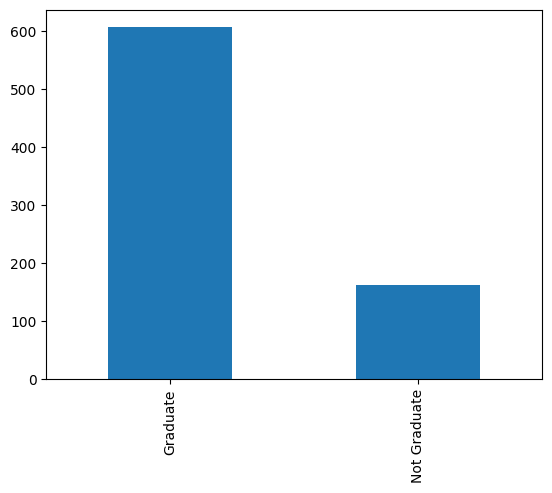

In [20]:
loan_data["Education"].value_counts().plot.bar()

<AxesSubplot: >

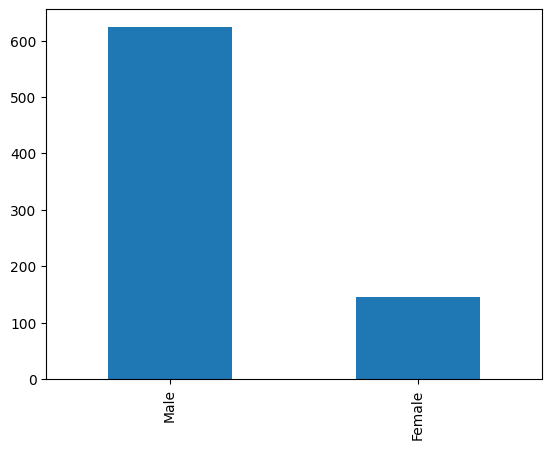

In [21]:
loan_data["Gender"].value_counts().plot(kind = "bar")

<AxesSubplot: >

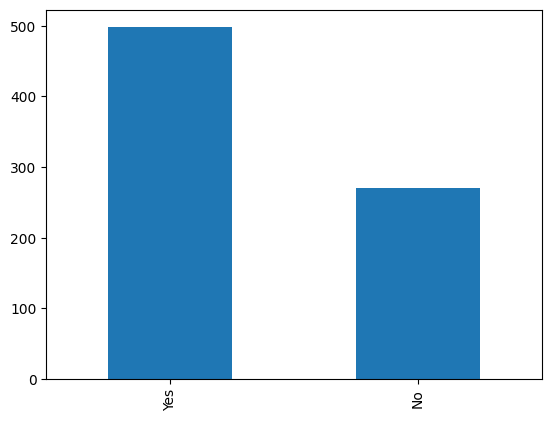

In [22]:
loan_data['Married'].value_counts().plot(kind = "bar")

this column can be converted to 0 and 1 

In [23]:
loan_data.replace({"Married":{'No':0,'Yes':1}},inplace=True)

In [24]:
loan_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,Male,1,1,Graduate,Yes,3343,1517.0,105.0,360.0,1.0,Rural,0
403,Female,0,2,Graduate,No,3427,0.0,138.0,360.0,1.0,Urban,0
513,Male,1,2,Graduate,No,7874,3967.0,336.0,360.0,1.0,Rural,0
437,Male,1,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,1
691,Male,0,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban,1


Now working on dependents column


<AxesSubplot: >

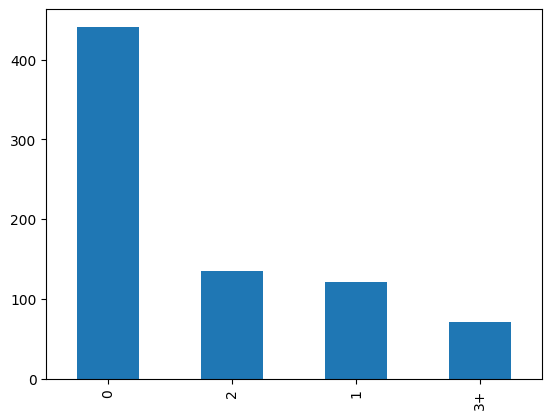

In [25]:
loan_data['Dependents'].value_counts().plot(kind='bar')

Replaceing 3+ with 4 so that can be converted to int

In [26]:
loan_data = loan_data.replace(to_replace='3+', value=4)

In [27]:
loan_data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
105,Female,0,0,Graduate,No,3644,0.0,110.0,360.0,1.0,Urban,0
550,Male,1,4,Not Graduate,No,3173,0.0,74.0,360.0,1.0,Semiurban,1
390,Male,1,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban,1
368,Male,1,1,Graduate,No,2491,2054.0,104.0,360.0,1.0,Semiurban,1
858,Male,1,2,Graduate,No,5000,0.0,149.0,360.0,1.0,Rural,0
749,Male,1,4,Graduate,No,2773,1497.0,108.0,360.0,1.0,Semiurban,0
110,Male,0,0,Graduate,No,6500,2600.0,200.0,360.0,1.0,Semiurban,0
8,Male,1,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,0
398,Male,1,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,1
587,Male,1,0,Graduate,No,7830,2183.0,212.0,360.0,1.0,Rural,0


In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             769 non-null    object 
 1   Married            769 non-null    int64  
 2   Dependents         769 non-null    object 
 3   Education          769 non-null    object 
 4   Self_Employed      769 non-null    object 
 5   ApplicantIncome    769 non-null    int64  
 6   CoapplicantIncome  769 non-null    float64
 7   LoanAmount         769 non-null    float64
 8   Loan_Amount_Term   769 non-null    float64
 9   Credit_History     769 non-null    float64
 10  Property_Area      769 non-null    object 
 11  Loan_Status        769 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 78.1+ KB


In [29]:
loan_data['Dependents']=loan_data['Dependents'].astype(int)

In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             769 non-null    object 
 1   Married            769 non-null    int64  
 2   Dependents         769 non-null    int32  
 3   Education          769 non-null    object 
 4   Self_Employed      769 non-null    object 
 5   ApplicantIncome    769 non-null    int64  
 6   CoapplicantIncome  769 non-null    float64
 7   LoanAmount         769 non-null    float64
 8   Loan_Amount_Term   769 non-null    float64
 9   Credit_History     769 non-null    float64
 10  Property_Area      769 non-null    object 
 11  Loan_Status        769 non-null    int64  
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 75.1+ KB


Education and loan status

<AxesSubplot: xlabel='Education', ylabel='count'>

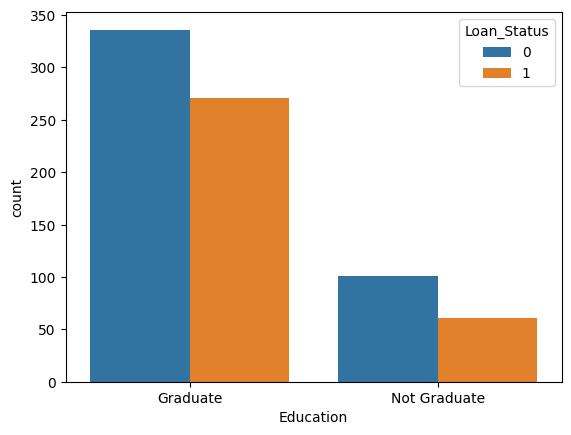

In [31]:
sb.countplot(x='Education',hue='Loan_Status',data=loan_data)

Marital Status and loan status

<AxesSubplot: xlabel='Married', ylabel='count'>

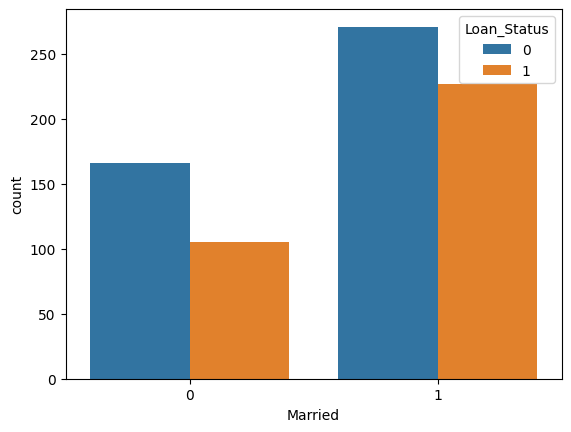

In [33]:
sb.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [34]:
loan_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
599,Male,0,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,0
911,Male,1,1,Graduate,Yes,2360,3355.0,87.0,240.0,1.0,Rural,0
585,Male,1,1,Graduate,No,6325,0.0,175.0,360.0,1.0,Semiurban,1
616,Female,0,0,Graduate,No,2545,0.0,74.0,360.0,1.0,Urban,0
777,Male,0,0,Not Graduate,No,3691,0.0,110.0,360.0,1.0,Rural,1


Changing all categorical values to int

In [35]:
loan_data.replace({'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             769 non-null    int64  
 1   Married            769 non-null    int64  
 2   Dependents         769 non-null    int32  
 3   Education          769 non-null    int64  
 4   Self_Employed      769 non-null    int64  
 5   ApplicantIncome    769 non-null    int64  
 6   CoapplicantIncome  769 non-null    float64
 7   LoanAmount         769 non-null    float64
 8   Loan_Amount_Term   769 non-null    float64
 9   Credit_History     769 non-null    float64
 10  Property_Area      769 non-null    int64  
 11  Loan_Status        769 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 75.1 KB


In [37]:
loan_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
254,1,0,0,1,0,4452,0.0,131.0,360.0,1.0,0,0
640,0,0,1,1,0,7600,0.0,92.0,360.0,1.0,1,0
225,1,1,4,1,0,13518,0.0,390.0,360.0,1.0,0,0
874,0,1,0,0,0,1647,1762.0,181.0,360.0,1.0,2,0
76,0,1,0,0,0,1928,1644.0,100.0,360.0,1.0,1,1


Now data is ready to seprated as data and label

## Seprarting Data and Label

In [38]:
X = loan_data.drop(columns=['Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [39]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
976       1        1           1          1              0             8072   
977       1        1           2          1              0             7583   
978       1        1           0          1              0             5000   
979       1        0           0          1              1             9200   
980       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## Train Test Split

In [41]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(769, 11) (692, 11) (77, 11)


## Model Selection, Training and Evaluation

### SVM

In [45]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [46]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.565028901734104


In [47]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6103896103896104


### Decision tree

In [48]:
classifier1 = DecisionTreeClassifier()
# training Decision tree
classifier1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [49]:
# accuracy score on the training data
X_train_prediction = classifier1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [50]:
# accuracy score on the test data
X_test_prediction = classifier1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5974025974025974


### Random forest

In [51]:
classifier2 = RandomForestClassifier()
# training RandomForest
classifier2.fit(X_train, Y_train)

RandomForestClassifier()

In [52]:
# accuracy score on the training data
X_train_prediction = classifier2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [53]:
# accuracy score on the test data
X_test_prediction = classifier2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5844155844155844


### Neural networks

In [54]:
classifier3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6, 3), random_state=1,max_iter = 10000)
# training Neural networks
classifier3.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 3), max_iter=10000,
              random_state=1, solver='lbfgs')

In [55]:
# accuracy score on the training data
X_train_prediction = classifier3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.4754335260115607


In [56]:
# accuracy score on the test data
X_test_prediction = classifier3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5454545454545454


## Making Pickel file from the Model